In [28]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from xgboost import XGBClassifier
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from helper_functions import (retrieve_feature_names, plot_feature_importances, plot_confusion_matrix)
    

In [29]:
bl_df = pd.read_csv('processed_data/bl_df.csv')

X = bl_df.drop(columns=['DX_6M', 'DX_12M', 'DX_24M', 'DX_48M', 'DX_60M'])  
y = bl_df[['DX_6M', 'DX_12M', 'DX_24M', 'DX_48M', 'DX_60M']] 

y_encoded = y.copy()
label_encoders = {}
for col in y_encoded.columns:
    le = LabelEncoder()
    y_encoded[col] = le.fit_transform(y_encoded[col])
    label_encoders[col] = le

    
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [30]:
numeric_features = ['AGE', 'FDG', 'PIB', 'AV45', 'ABETA', 'TAU', 'PTAU', 'ADAS11', 'ADAS13', 'RAVLT_immediate', 'RAVLT_learning',
                    'RAVLT_forgetting', 'RAVLT_perc_forgetting', 'LDELTOTAL', 'DIGITSCOR', 'TRABSCOR', 'FAQ', 'MOCA', 'EcogPtMem', 
                    'EcogPtLang', 'EcogPtVisspat', 'EcogPtTotal', 'EcogSPTotal', 'Ventricles', 'Hippocampus', 'WholeBrain', 
                    'Entorhinal', 'Fusiform', 'MidTemp', 'ICV', 'mPACCdigit', 'mPACCtrailsB', 'EcogPtOrgan', 'EcogSPMem', 'EcogSPLang',
                    'EcogSPVisspat', 'EcogSPPlan', 'EcogSPOrgan', 'EcogPtPlan', 'EcogPtDivatt', 'EcogSPDivatt',]

categorical_features = ['SITE', 'APOE4', 'PTEDUCAT', 'CDRSB', 'MMSE', 
                        'COLPROT', 'ORIGPROT', 'PTGENDER', 'PTETHCAT', 'PTRACCAT', 'PTMARRY', 'FLDSTRENG', 'FSVERSION']

In [31]:
xgb_clf = XGBClassifier(eval_metric='mlogloss', random_state=42)

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)  # Updated to sparse_output

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MultiOutputClassifier(xgb_clf))
])

param_space = {
    'classifier__estimator__learning_rate': Real(1e-4, 1e-1, prior='log-uniform'),
    'classifier__estimator__n_estimators': Integer(50, 200),
    'classifier__estimator__max_depth': Integer(3, 12),
    'classifier__estimator__subsample': Real(0.5, 1.0),
    'classifier__estimator__colsample_bytree': Real(0.5, 1.0),
    'classifier__estimator__gamma': Real(0, 10, prior='uniform')
}

In [32]:
def multioutput_accuracy_score(y_true, y_pred):
    y_true = np.array(y_true) 
    y_pred = np.array(y_pred) 
    accuracies = [accuracy_score(y_true[:, i], y_pred[:, i]) for i in range(y_true.shape[1])]
    return np.mean(accuracies)
custom_scorer = make_scorer(multioutput_accuracy_score, greater_is_better=True)


In [33]:
opt = BayesSearchCV(
    estimator=pipeline,
    search_spaces=param_space,
    n_iter=50,  
    cv=3,       
    scoring=custom_scorer,
    n_jobs=-1,
    verbose=1
)
opt.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

BayesSearchCV(cv=3,
              estimator=Pipeline(steps=[('preprocessor',
                                         ColumnTransformer(transformers=[('num',
                                                                          StandardScaler(),
                                                                          ['AGE',
                                                                           'FDG',
                                                                           'PIB',
                                                                           'AV45',
                                                                           'ABETA',
                                                                           'TAU',
                                                                           'PTAU',
                                                                           'ADAS11',
                                                                           'ADAS13',
                                                                           'RAVLT_immediate',
                                                                           'RAVLT_learning',
                                                                           'RAVLT_forgetting',
                                                                           'RAVLT_perc_forgetting',
                                                                           'LDELTOTAL',
                                                                           'DIGITSCOR',
                                                                           'TRABSCOR',
                                                                           'FAQ',
                                                                           'MOCA',
                                                                           'EcogPtMem',
                                                                           'EcogPtLang',
                                                                           'EcogPtVisspat',
                                                                           '...
                             'classifier__estimator__learning_rate': Real(low=0.0001, high=0.1, prior='log-uniform', transform='normalize'),
                             'classifier__estimator__max_depth': Integer(low=3, high=12, prior='uniform', transform='normalize'),
                             'classifier__estimator__n_estimators': Integer(low=50, high=200, prior='uniform', transform='normalize'),
                             'classifier__estimator__subsample': Real(low=0.5, high=1.0, prior='uniform', transform='normalize')},
              verbose=1)

In [34]:
print("Best Parameters:")
print(opt.best_params_)

Best Parameters:
OrderedDict({'classifier__estimator__colsample_bytree': 0.5, 'classifier__estimator__gamma': 2.611370046167039, 'classifier__estimator__learning_rate': 0.0001, 'classifier__estimator__max_depth': 8, 'classifier__estimator__n_estimators': 133, 'classifier__estimator__subsample': 0.8410167136312328})
Test Set Accuracies for Each Label: [0.927710843373494, 0.8393574297188755, 0.7108433734939759, 0.5983935742971888, 0.7590361445783133]


In [ ]:
y_pred = opt.predict(X_test)
y_test_np = np.array(y_test)
y_pred_np = np.array(y_pred)
accuracies = [accuracy_score(y_test_np[:, i], y_pred_np[:, i]) for i in range(y_test_np.shape[1])]
print(f"Test Set Accuracies for Each Label: {accuracies}")

In [35]:
y_pred_decoded = {}
for i, col in enumerate(y.columns):
    le = label_encoders[col]
    if y_pred.shape[0] == 1:
        y_pred_decoded[col] = le.inverse_transform(y_pred[0, :, i])
    else:
        y_pred_decoded[col] = le.inverse_transform(y_pred[:, i])

y_test_decoded = {}
for col in y.columns:
    le = label_encoders[col]
    y_test_decoded[col] = le.inverse_transform(y_test[col])

In [36]:
for col in y.columns:
    print(classification_report(
    y_test_decoded[col], 
    y_pred_decoded[col],
    zero_division=0
))

              precision    recall  f1-score   support

          CN       0.96      0.98      0.97        92
    Dementia       0.00      0.00      0.00        10
DidNotAttend       1.00      0.60      0.75        10
         MCI       0.91      0.99      0.94       137

    accuracy                           0.93       249
   macro avg       0.72      0.64      0.67       249
weighted avg       0.89      0.93      0.91       249

              precision    recall  f1-score   support

          CN       0.90      0.94      0.92        83
    Dementia       0.57      0.24      0.33        17
DidNotAttend       0.64      0.28      0.39        25
         MCI       0.83      0.97      0.90       124

    accuracy                           0.84       249
   macro avg       0.73      0.61      0.63       249
weighted avg       0.82      0.84      0.81       249

              precision    recall  f1-score   support

          CN       0.87      0.96      0.91        81
    Dementia       0.

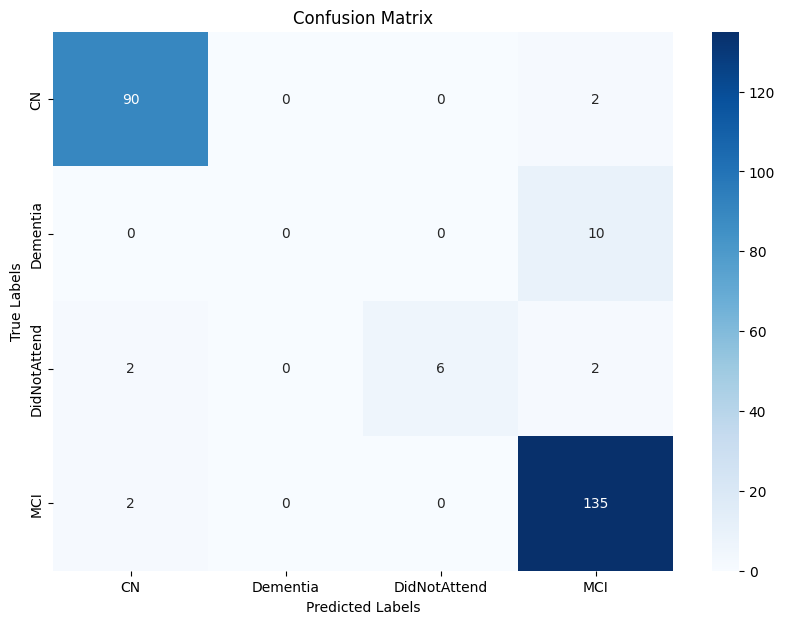

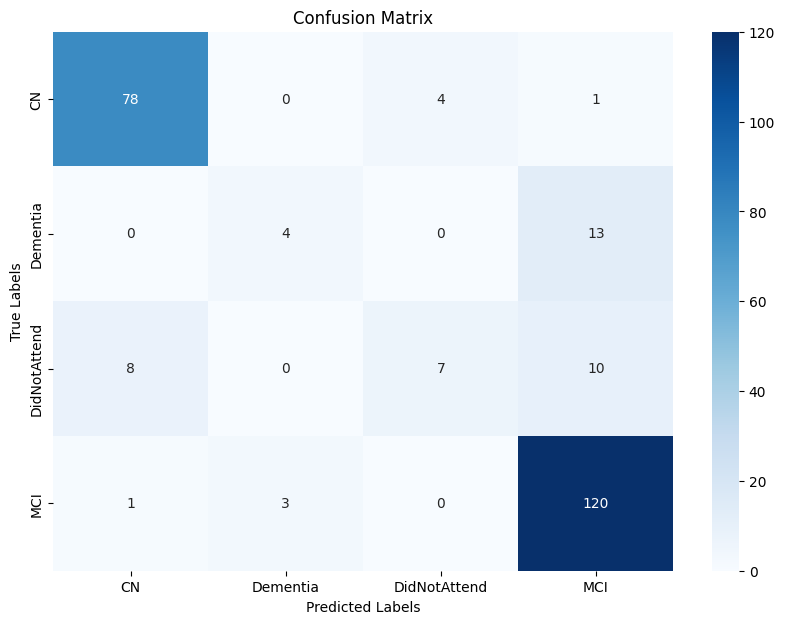

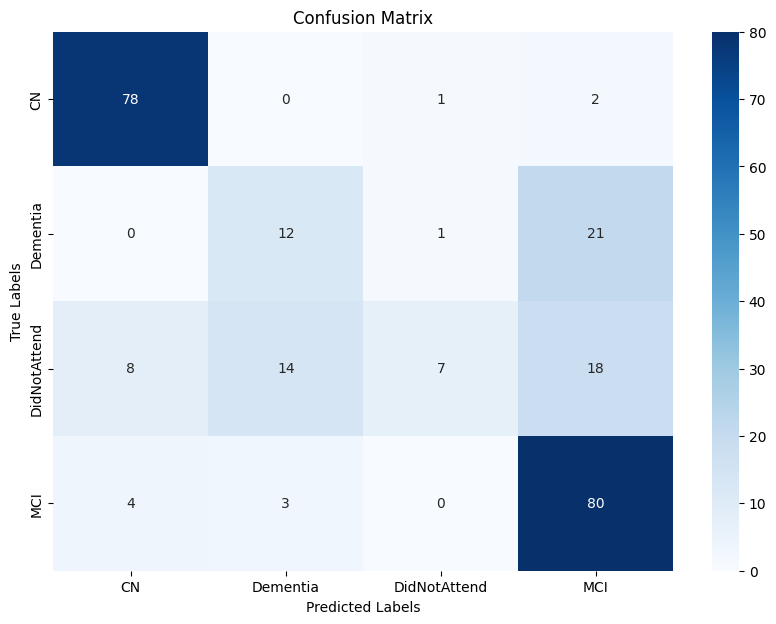

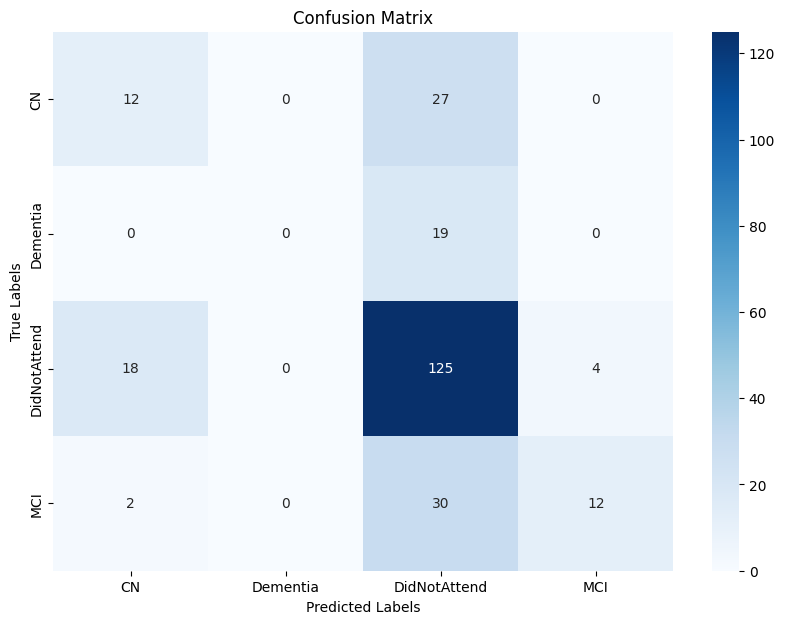

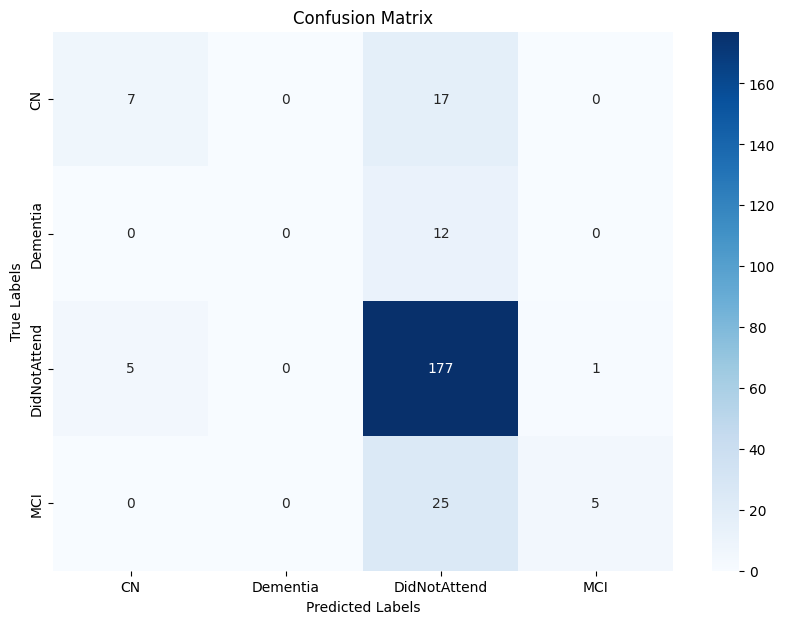

In [37]:
for col in y.columns:
    plot_confusion_matrix(y_test_decoded[col], y_pred_decoded[col], le.classes_, f'Confusion Matrix')

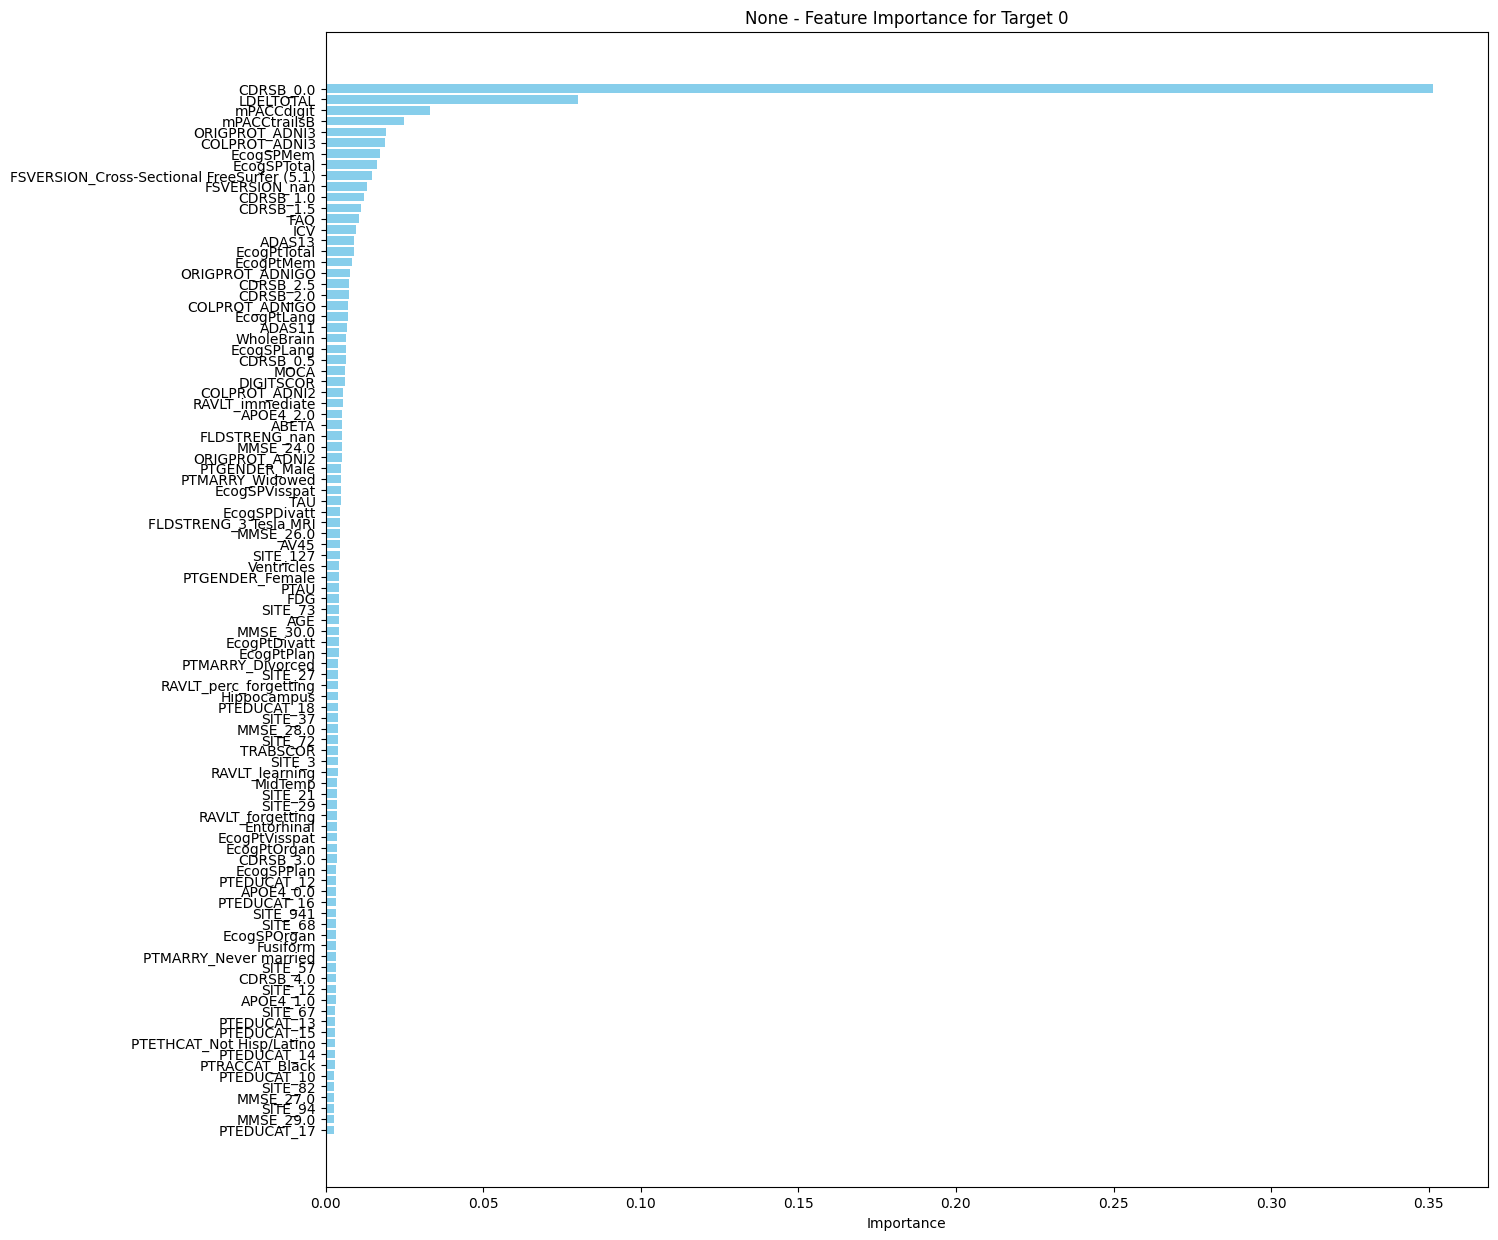

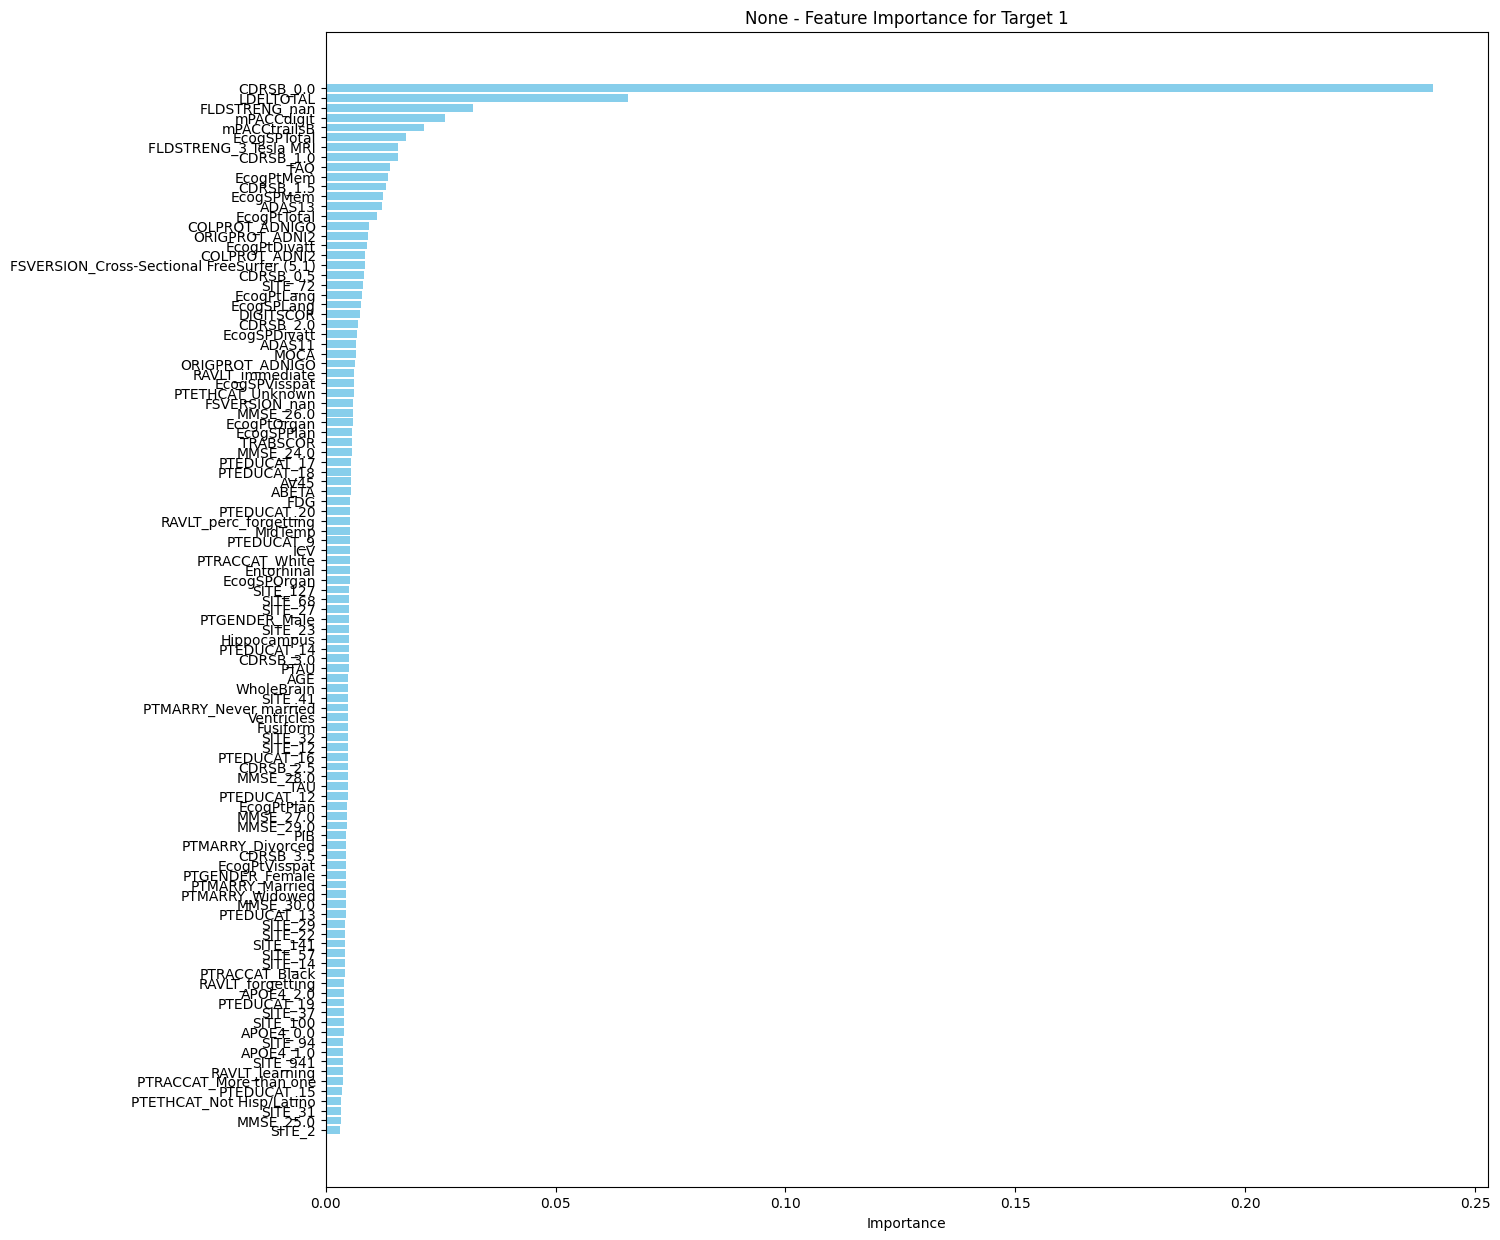

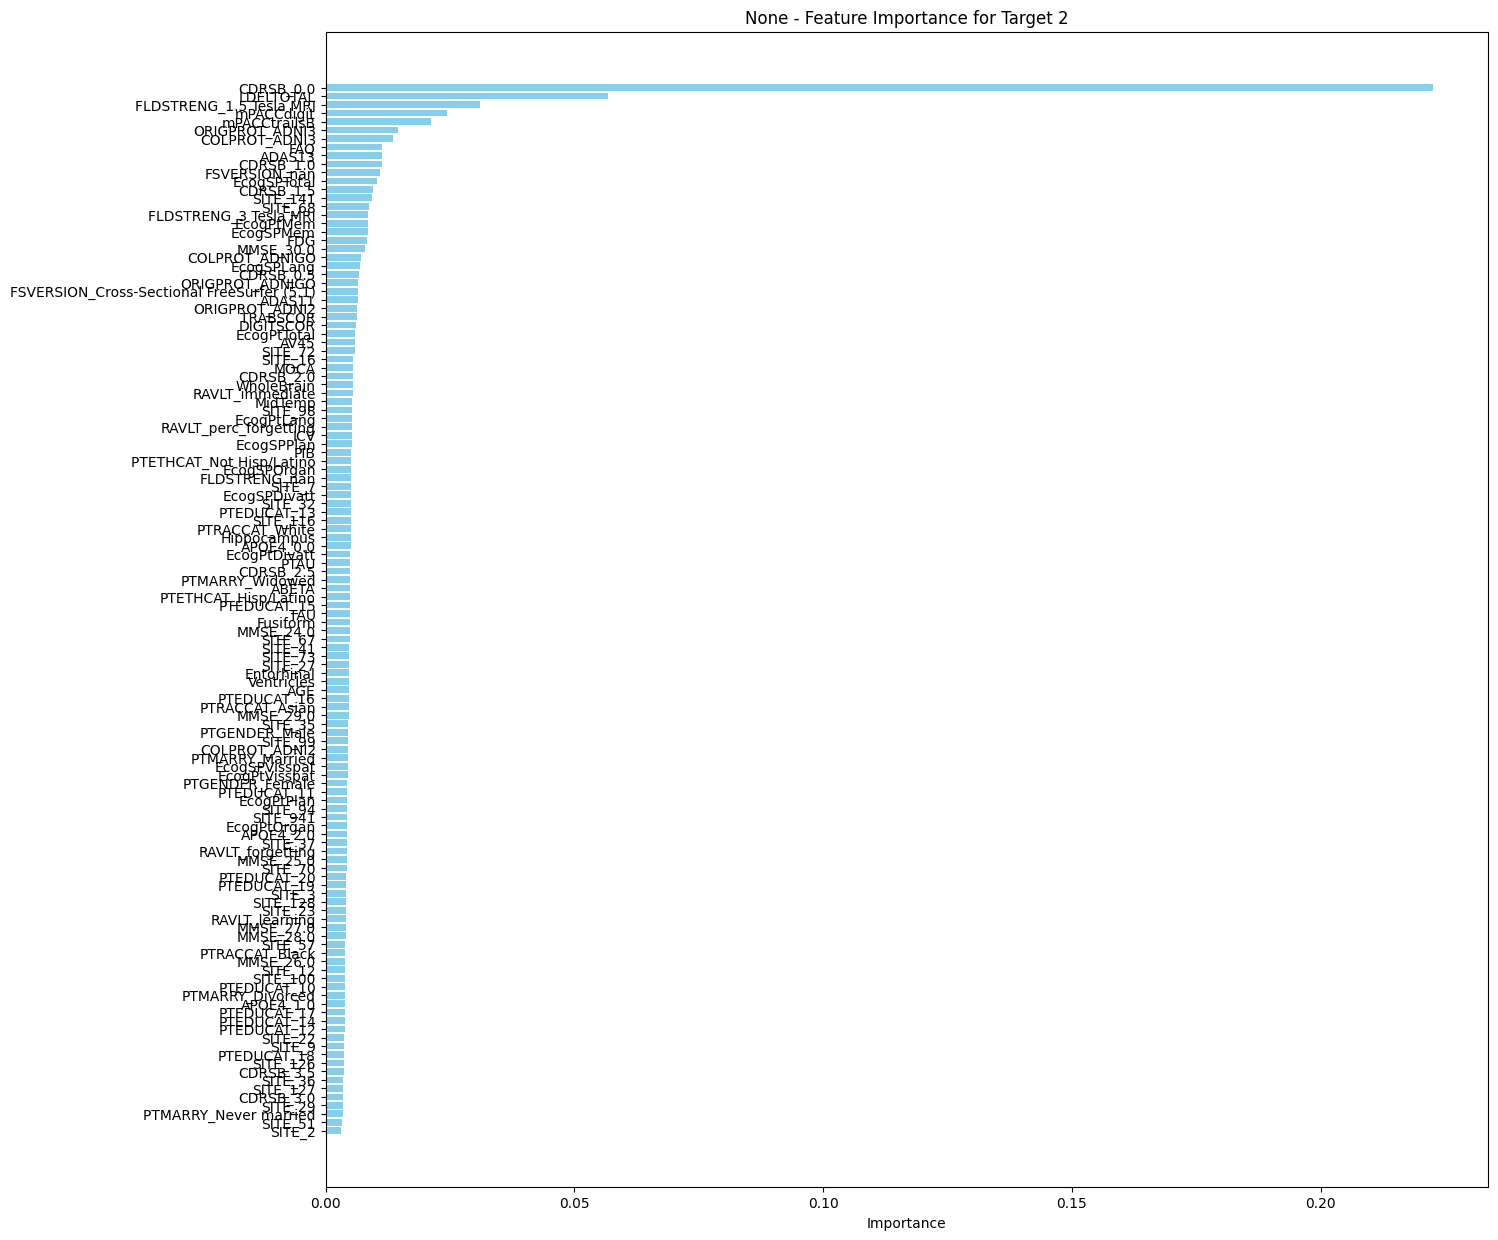

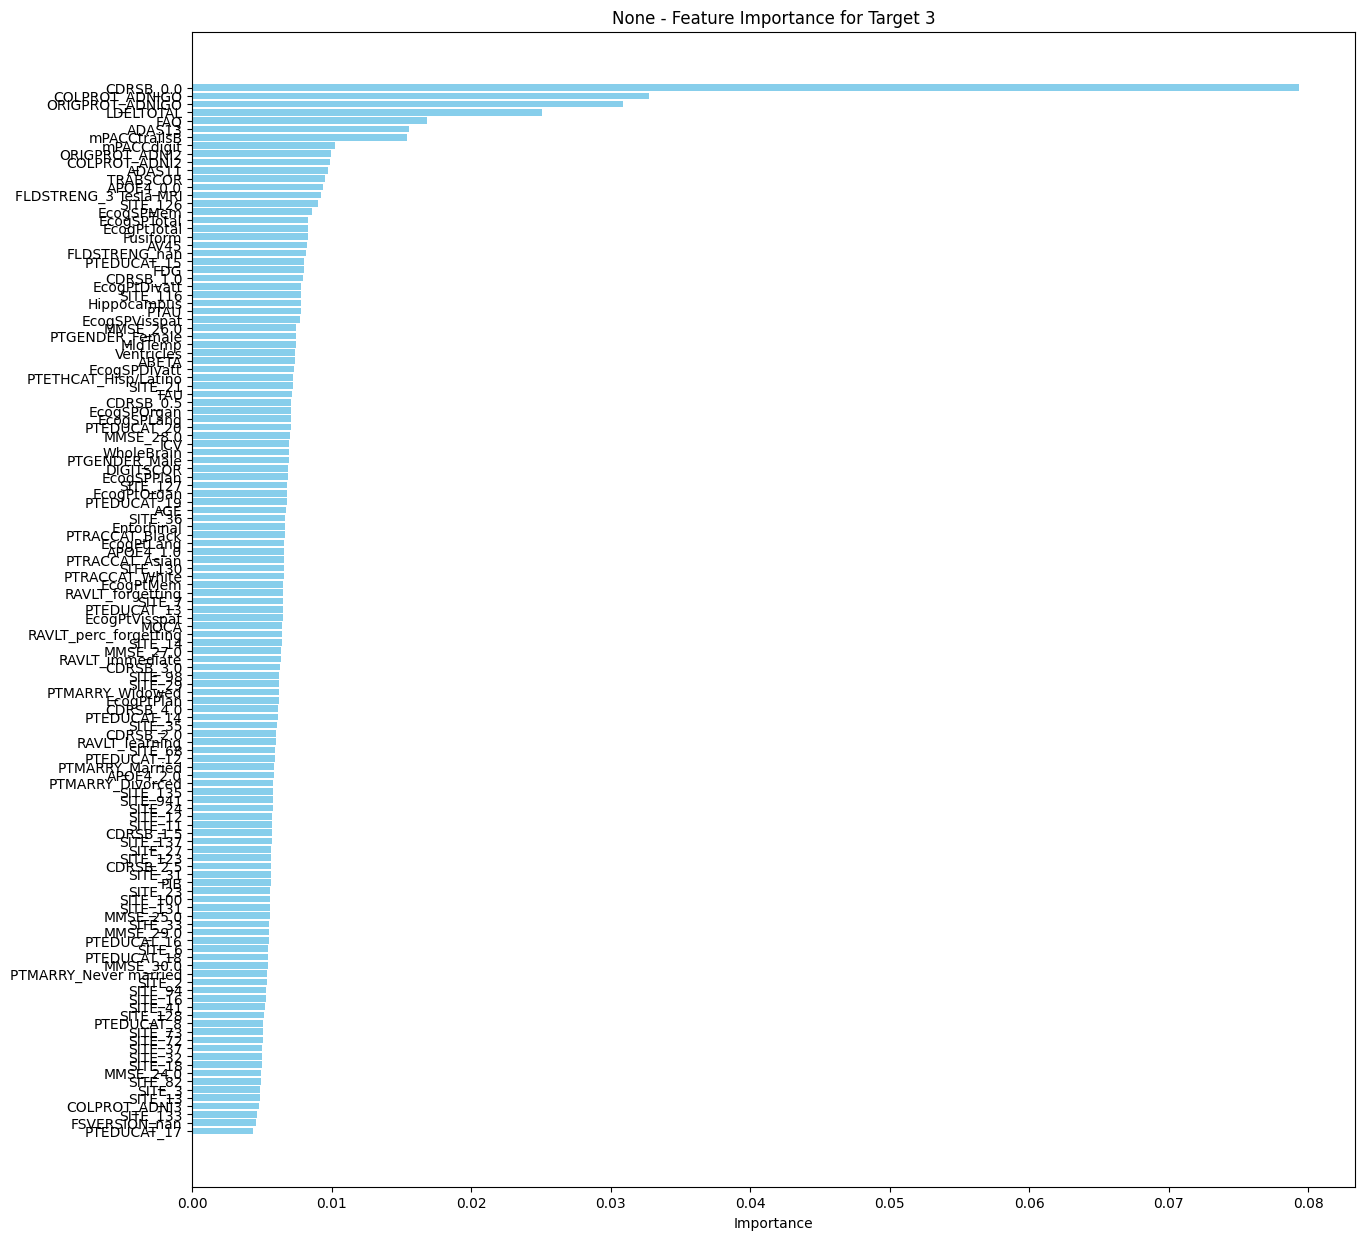

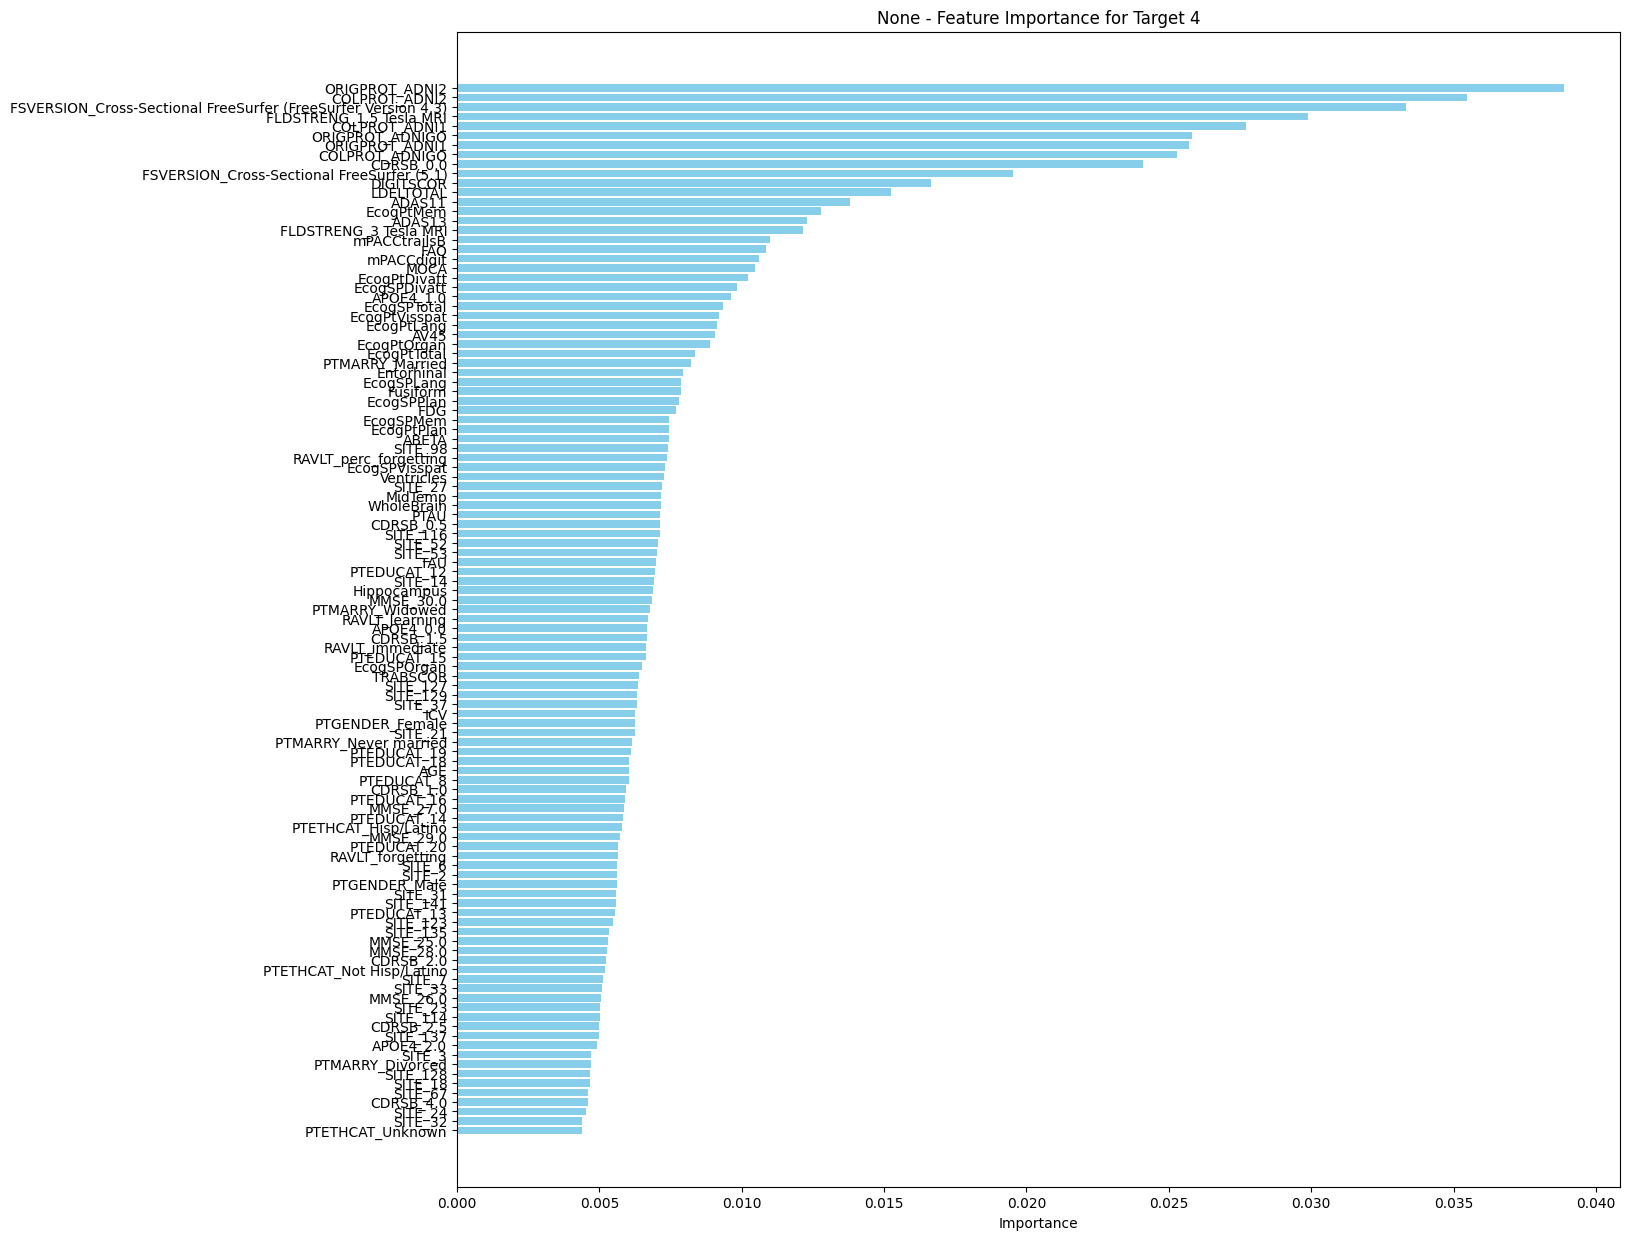

In [40]:
plot_feature_importances(opt.best_estimator_)